# Dataset:
## Telecom Churn Prediction Dataset
##### --> Description : Contains cuatomer information for a subscription-based service provider to predict customer churn (leaving the service)
##### --> Columns : Includes customer details, services used, contract terms, and churn status
##### --> Purpose : Used for customer churn analysis, segmentation, and retention strategie
##### --> Applications : Chrun prediction, customer satisfaction analysis, and targeted marketing
##### --> Analysis Tasks : EDA, data preprocessing, ML model building, evaluation, and model deployment
##### --> Relevence : A practical dataset for real-world data science and customer relationship management scenarios

### Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [3]:
telecom_cust = pd.read_csv('Telco_Customer_Churn.csv')

### Data preprocessing & EDA

In [4]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [12]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors = 'coerce')

In [13]:
# Checking for null values
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
# Removing missing values
telecom_cust.dropna(inplace = True)

In [15]:
# Remove customer IDs from the data
df2 = telecom_cust.iloc[:,1:]

In [16]:
# Convert the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace = 'Yes' , value = 1, inplace=True)
df2['Churn'].replace(to_replace = 'No' , value = 0, inplace=True)

In [17]:
# Let's convert all categorical values into a dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


<Axes: >

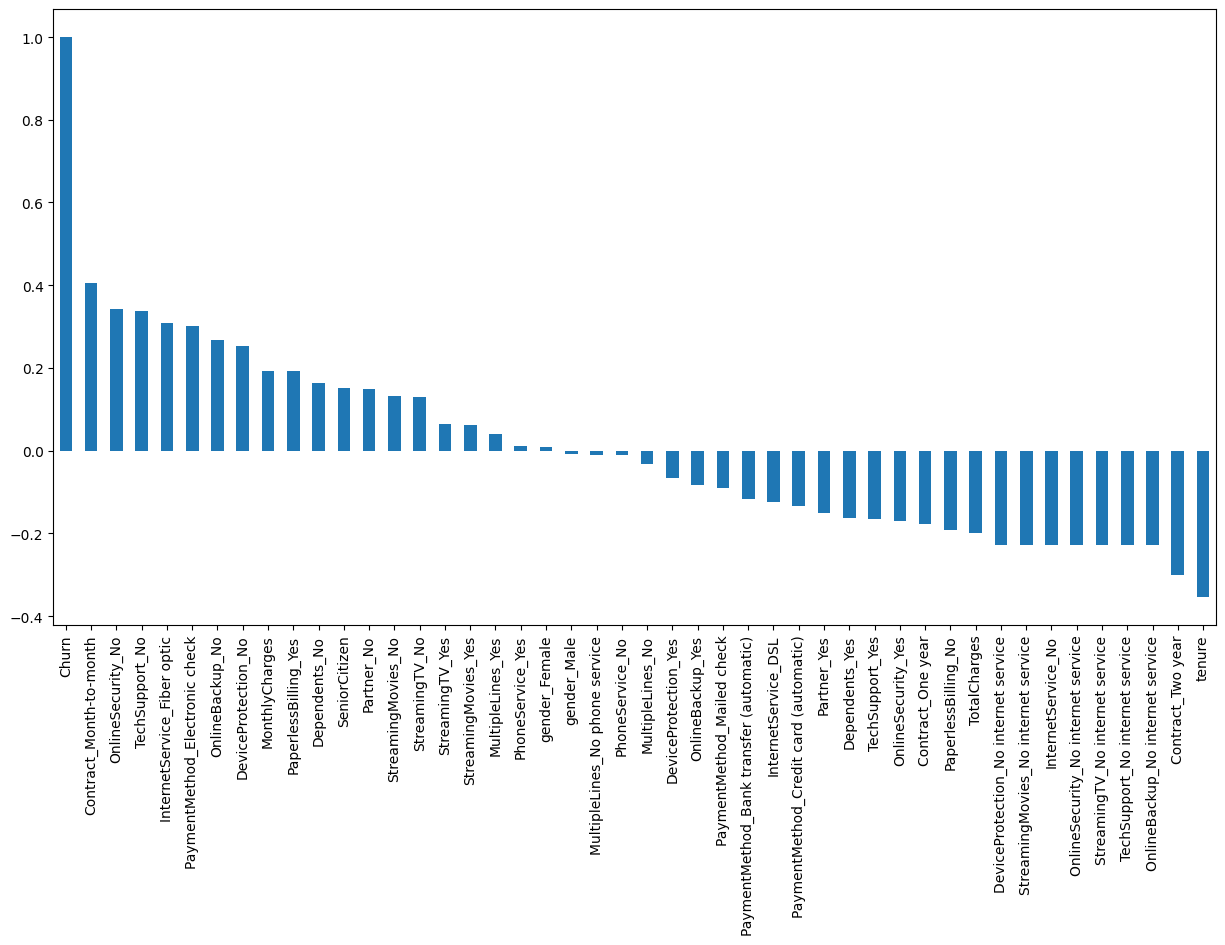

In [18]:
# Get Correlation of "Churn" with other variables
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#### Gender Distribution

In [21]:
gender_counts = df2['gender'].value_counts(normalize=True) * 100  # Multiply by 100 to get percentages2

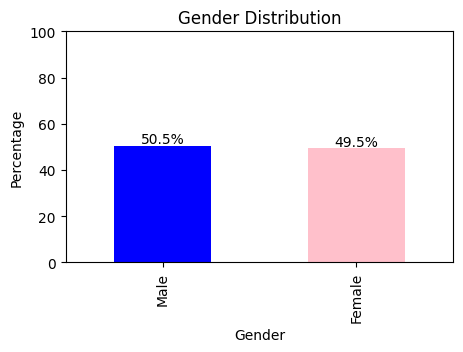

In [24]:
plt.figure(figsize=(5, 3))  # Set figure size
gender_counts.plot(kind='bar', color=['blue', 'pink'])  # Create bar chart

# Customize the plot
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender Distribution')
plt.ylim(0, 100)  # Set y-axis range to 0-100 for percentage

# Display the percentages on top of each bar
for index, value in enumerate(gender_counts):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center')

plt.show()

### Senioe Citizen

In [26]:
# Get the count of each category and convert to percentage
senior_citizen_counts = df2['SeniorCitizen'].value_counts(normalize=True) * 100

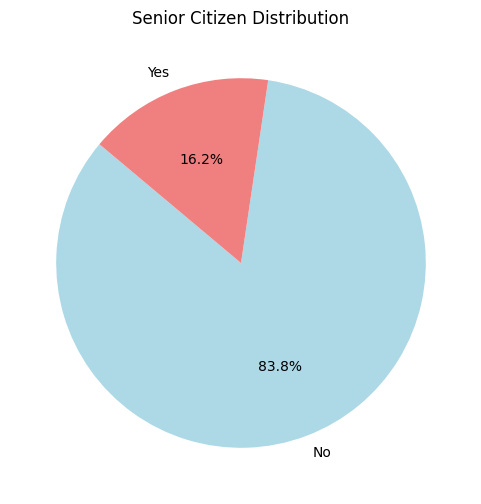

In [29]:
plt.figure(figsize=(6, 6))  # Set the figure size for the pie chart
plt.pie(senior_citizen_counts, labels=['No','Yes'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])

# Customize the chart
plt.title('Senior Citizen Distribution')
plt.show()

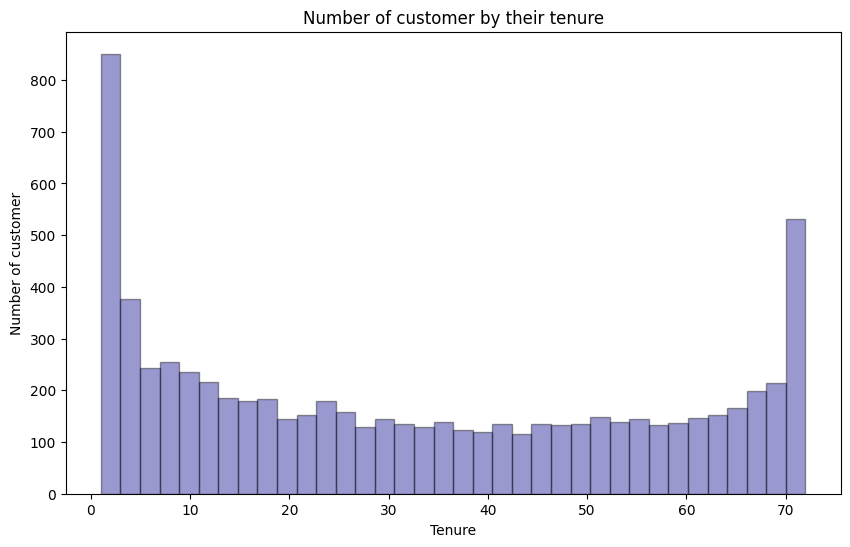

In [37]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the distplot for the 'tenure' column
sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Add labels and title
plt.xlabel('Tenure')
plt.ylabel('Number of customer')
plt.title('Number of customer by their tenure')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Distribution of Contract Types')

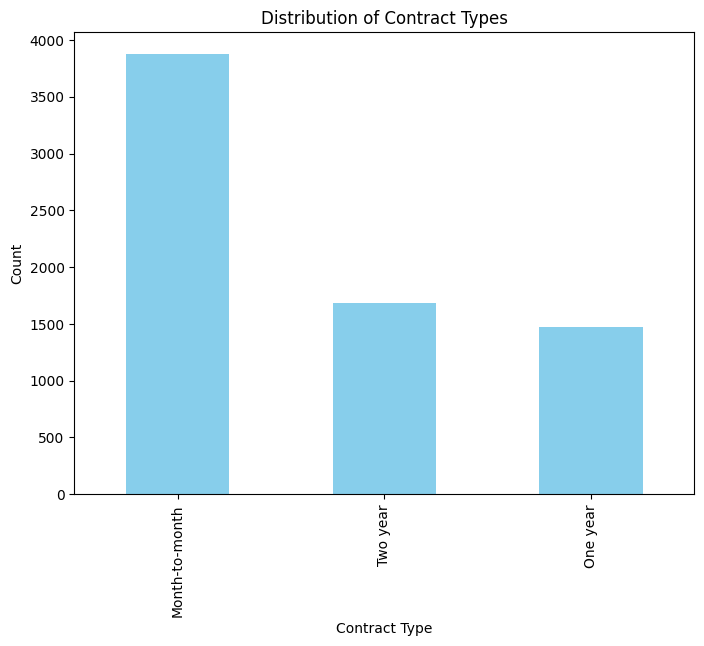

In [43]:
contract_counts = df2['Contract'].value_counts()
# Set the figure size
plt.figure(figsize=(8, 6))
# Create the bar graph
contract_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Distribution of Contract Types')

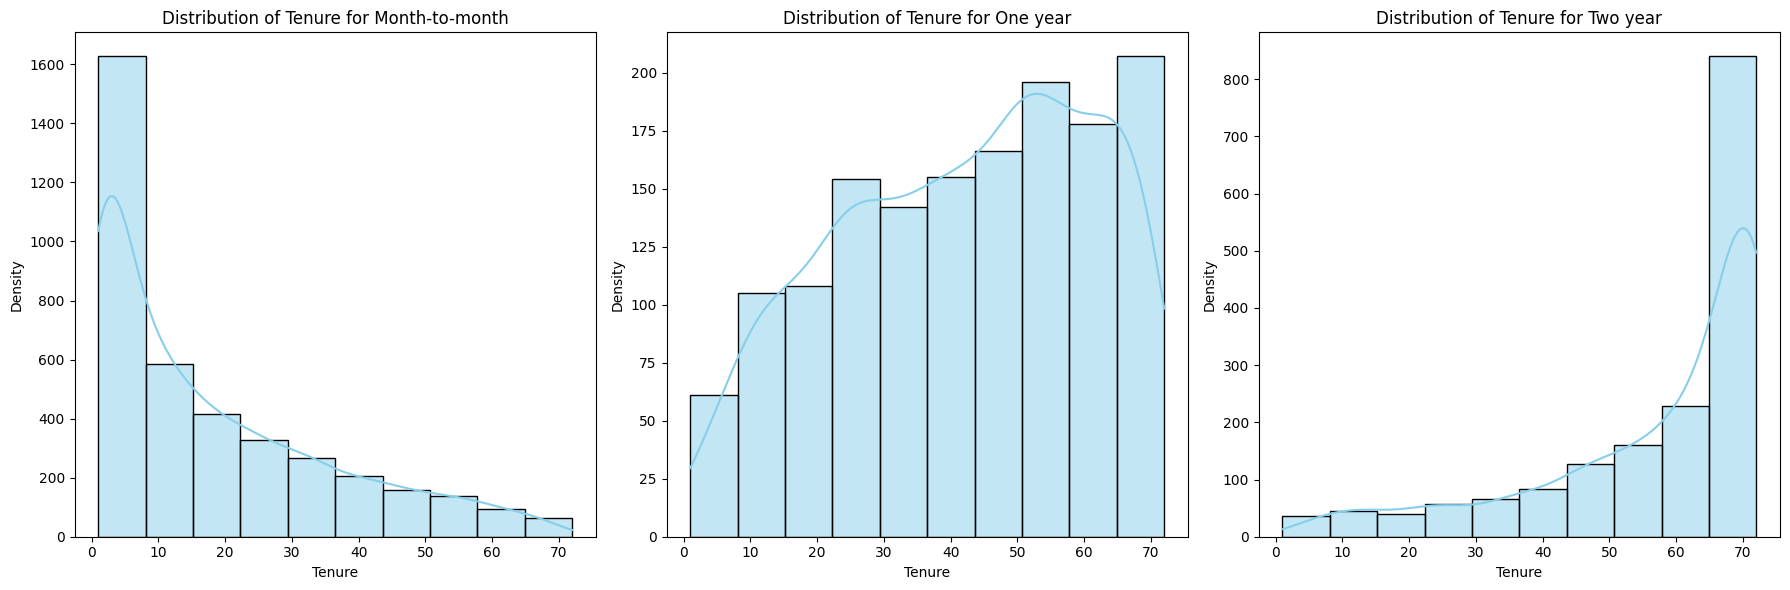

In [47]:
# Create subplots: (nrows, ncols)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
axes = axes.flatten()  # Flatten to easily iterate over axes

# Define contract types for plotting
contract_types = df2['Contract'].unique()

# Loop through each subplot and create a distplot for each contract type
for i, contract_type in enumerate(contract_types):
    # Filter the data for the specific contract type
    data = df2[df2['Contract'] == contract_type]['tenure']
    
    # Create the distplot for the specific contract type
    sns.histplot(data, kde=True, bins=10, ax=axes[i], color='skyblue')
    
    # Set labels and title for each subplot
    axes[i].set_xlabel('Tenure')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Distribution of Tenure for {contract_type}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


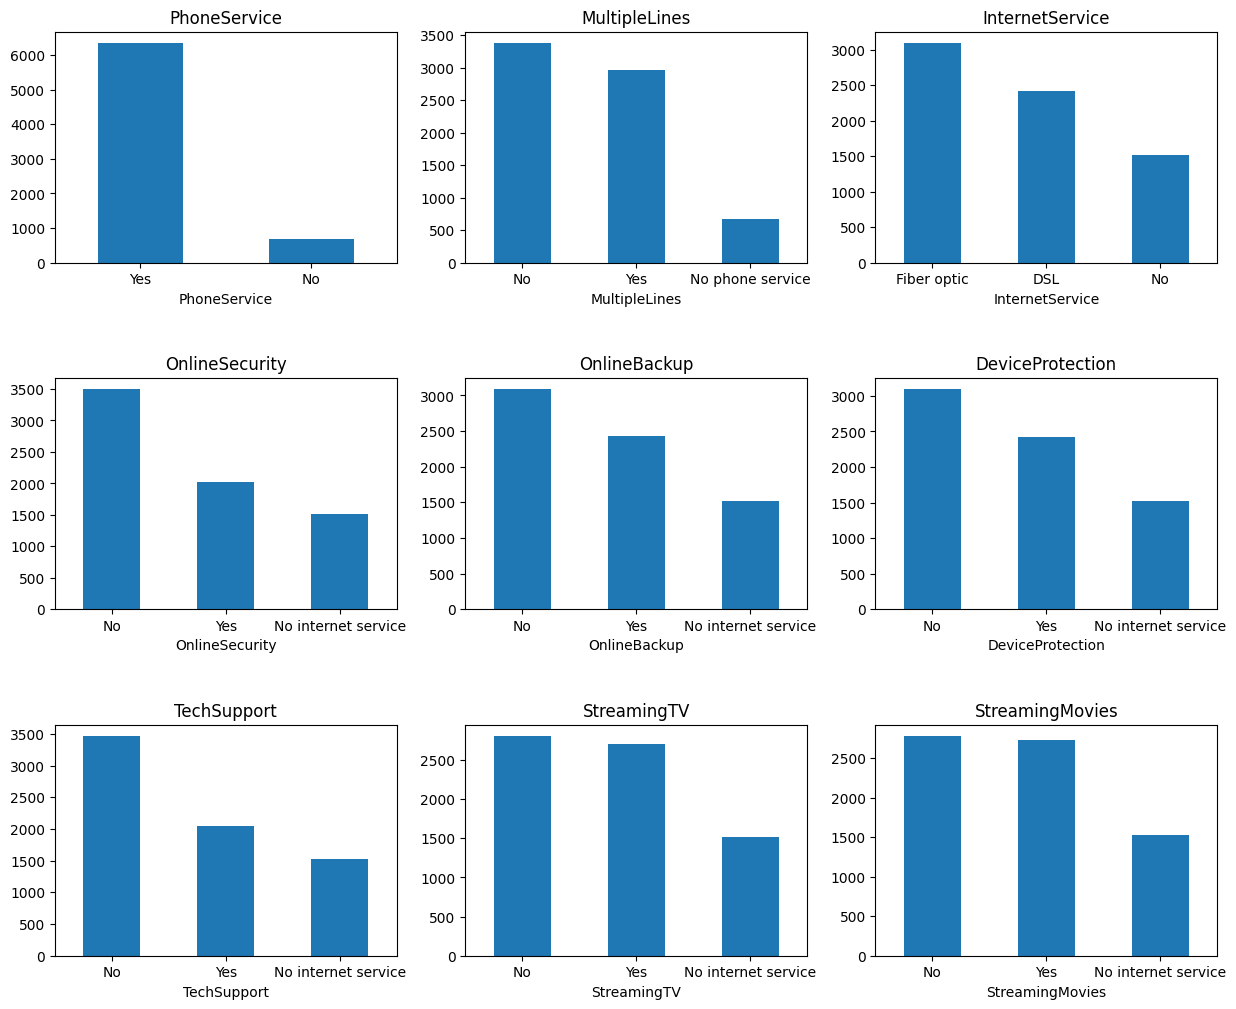

In [48]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

for i, item in enumerate(services):
    row, col = divmod(i, 3)  # Calculate row and column index

    ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[row, col], rot=0)
    ax.set_title(item)

    for tick in ax.get_xticklabels():
        tick.set_rotation(0)  # Rotate x-axis labels for better readability

plt.show()

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

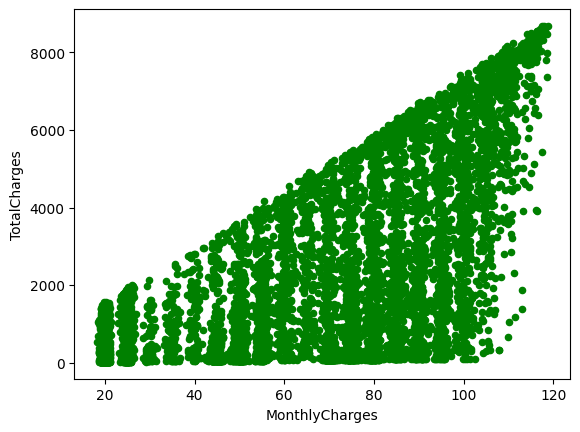

In [49]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges', color = 'green')

In [70]:
churn_counts = df2['Churn'].value_counts(normalize=True) * 100

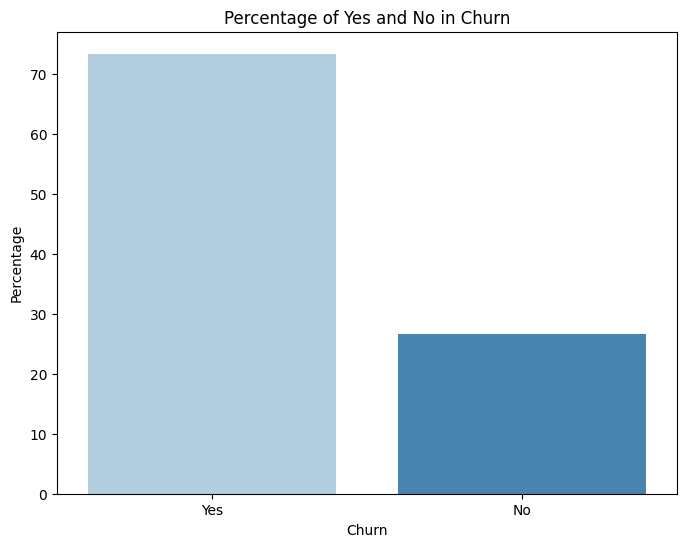

In [74]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create the bar plot
df2['Churn'] = df2['Churn'].replace({0: 'No', 1: 'Yes'})
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='Blues')

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Percentage of Yes and No in Churn')

# Show the plot
plt.show()


### churn vs tenure

<Axes: xlabel='Churn', ylabel='tenure'>

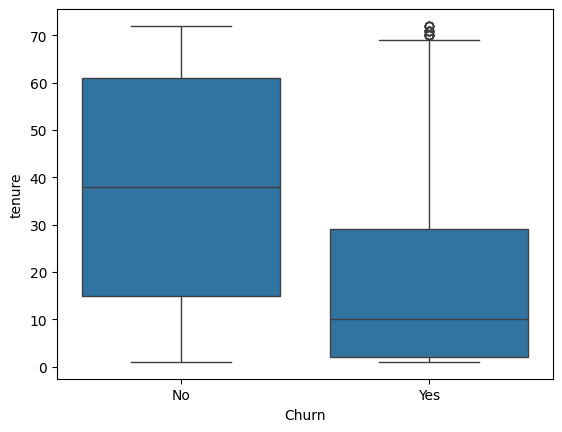

In [75]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

### Churn by monthly charges

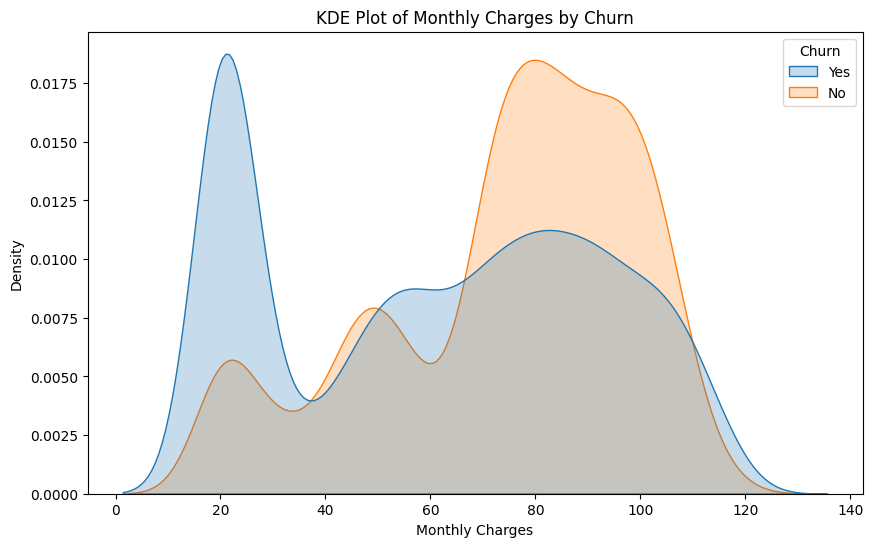

In [76]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the KDE plot
sns.kdeplot(data=df2, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False)

# Add labels and title
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('KDE Plot of Monthly Charges by Churn')

# Show the plot
plt.show()


### Churn by Total Charges

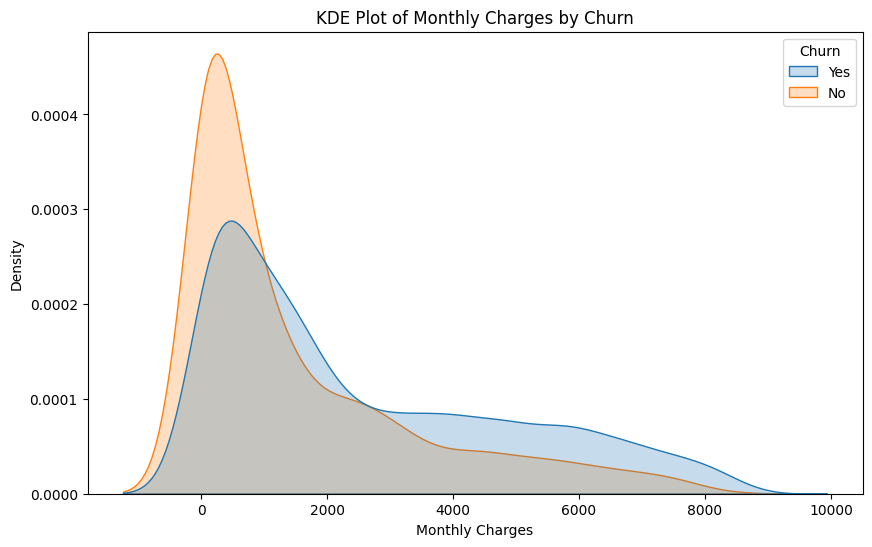

In [77]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the KDE plot
sns.kdeplot(data=df2, x='TotalCharges', hue='Churn', fill=True, common_norm=False)

# Add labels and title
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('KDE Plot of Monthly Charges by Churn')

# Show the plot
plt.show()


## Predictive model - ML algorithms

### Developing
#### --> Logistic Regression
#### --> Random Forest
#### --> SVM
#### --> ADA Boost 
#### --> XG Boost

### 1. Logistic Regression

In [78]:
# We will use the data frame where we had created dummy variables

y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1

from sklearn.preprocessing import MinMaxScaler

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [79]:
# Create Train & Test Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [80]:
# Running logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [81]:
from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the prediction accuracy

print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


## 2. Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

# Make predictions

prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8088130774697939


## 3. Support Vector Machine

In [83]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8073916133617626

In [84]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))

[[950 102]
 [169 186]]


## 4. ADA Boost 

In [85]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8123667377398721

## 5. XG Boost

In [92]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7796730632551528